In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inline Plots in Jupyter
%matplotlib inline

In [2]:
data = pd.read_csv('../heart_dataset.csv')
data.shape

(1510, 14)

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,53.903974,0.747682,1.852980,132.247682,219.640397,0.150331,0.662914,141.713907,0.386093,1.013683,0.652980,0.570861,2.660265,0.527815
std,9.293715,0.434487,1.147609,17.886013,94.110709,0.357514,0.813009,25.295083,0.487014,1.136282,0.592734,0.853759,1.488350,0.499391
min,28.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,198.250000,0.000000,0.000000,123.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,233.500000,0.000000,0.000000,143.500000,0.000000,0.800000,1.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,271.000000,0.000000,1.000000,161.000000,1.000000,1.800000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,7.000000,1.000000


In [4]:
data.target.value_counts()

target
1    797
0    713
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1510 non-null   int64  
 1   sex       1510 non-null   int64  
 2   cp        1510 non-null   int64  
 3   trestbps  1510 non-null   int64  
 4   chol      1510 non-null   int64  
 5   fbs       1510 non-null   int64  
 6   restecg   1510 non-null   int64  
 7   thalach   1510 non-null   int64  
 8   exang     1510 non-null   int64  
 9   oldpeak   1510 non-null   float64
 10  slope     1510 non-null   int64  
 11  ca        1510 non-null   int64  
 12  thal      1510 non-null   int64  
 13  target    1510 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 165.3 KB


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
X = data.iloc[:,:13].values
y = data["target"].values

In [8]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE(random_state=42).fit_resample(X, y)

# Printing number of samples in each class after Under-Sampling
t = [(d) for d in y if d == 0]
s = [(d) for d in y if d == 1]
print('After Under-Sampling: ')
print('Samples in class 0: ', len(t))
print('Samples in class 1: ', len(s))


After Under-Sampling: 
Samples in class 0:  797
Samples in class 1:  797


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Silence Info Logspam from tensorflow
# Aparently the official docs methods don't work
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.layers import PReLU

classifier = Sequential()

# Input Layer
classifier.add(InputLayer(shape=(13,)))

# 1st hidden layer
classifier.add(Dense(units=166, kernel_regularizer=l2(0.008)))
classifier.add(PReLU(alpha_initializer=tf.keras.initializers.Constant(0.06)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.13))

# 2nd hidden layer
classifier.add(Dense(units=105, kernel_regularizer=l2(0.008)))
classifier.add(PReLU(alpha_initializer=tf.keras.initializers.Constant(0.06)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.13))

# 3rd hidden layer
classifier.add(Dense(units=87,  kernel_regularizer=l2(0.008)))
classifier.add(PReLU(alpha_initializer=tf.keras.initializers.Constant(0.06)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.13))

# Output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [13]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 166)            │         2,324 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu (PReLU)                 │ (None, 166)            │           166 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 166)            │           664 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 166)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 105)            │        17,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_1 (PReLU)               │ (None, 105)            │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 105)            │           420 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 105)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 87)             │         9,222 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_2 (PReLU)               │ (None, 87)             │            87 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 87)             │           348 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 87)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,959 (120.93 KB)

 Trainable params: 30,243 (118.14 KB)

 Non-trainable params: 716 (2.80 KB)

In [14]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

classifier.compile(optimizer=Adam(learning_rate=0.0064),loss="binary_crossentropy",metrics=["accuracy"])
classifier_report = classifier.fit(X_train,y_train, validation_data=(X_train,y_train), validation_split=0.30, batch_size=32, epochs=145, callbacks=[early_stopping, reduce_lr], verbose=1 )

Epoch 1/145
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7076 - loss: 2.2013 - val_accuracy: 0.7318 - val_loss: 1.7294 - learning_rate: 0.0064
Epoch 2/145
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7561 - loss: 1.3447 - val_accuracy: 0.7543 - val_loss: 1.1814 - learning_rate: 0.0064
Epoch 3/145
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7749 - loss: 0.9133 - val_accuracy: 0.5157 - val_loss: 0.9727 - learning_rate: 0.0064
Epoch 4/145
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7848 - loss: 0.7555 - val_accuracy: 0.6583 - val_loss: 0.8791 - learning_rate: 0.0064
Epoch 5/145
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7919 - loss: 0.6857 - val_accuracy: 0.7605 - val_loss: 0.8287 - learning_rate: 0.0064
Epoch 6/145
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8108 - loss: 0.6180 - val_accuracy: 0.6269 - val_loss: 0.7879 - learning_rate: 0.0064
Epoch 7/145
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8117 - loss: 0.6253 - v

In [15]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [16]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score*100)

81.41962421711901


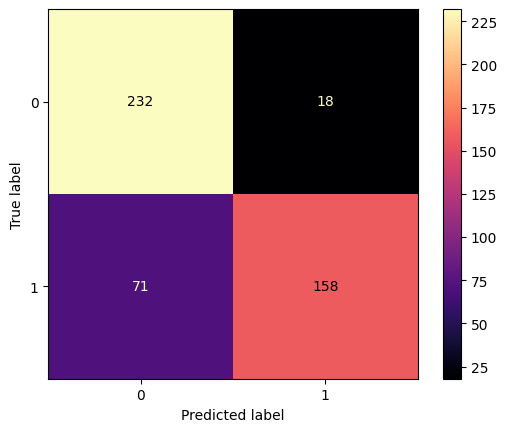

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='magma')
plt.show()

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       250
           1       0.90      0.69      0.78       229

    accuracy                           0.81       479
   macro avg       0.83      0.81      0.81       479
weighted avg       0.83      0.81      0.81       479



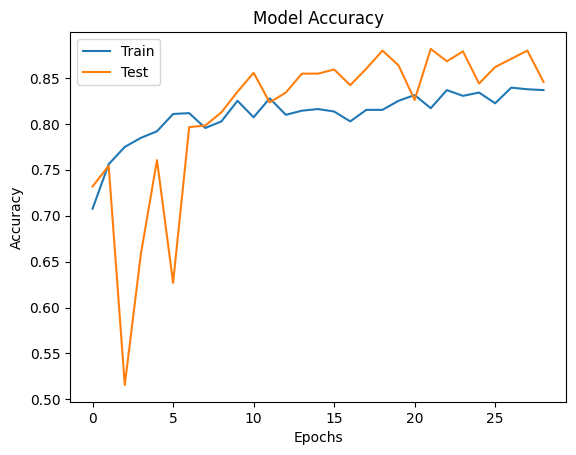

In [19]:
# Acuracy Plot
plt.plot(classifier_report.history['accuracy'])
plt.plot(classifier_report.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

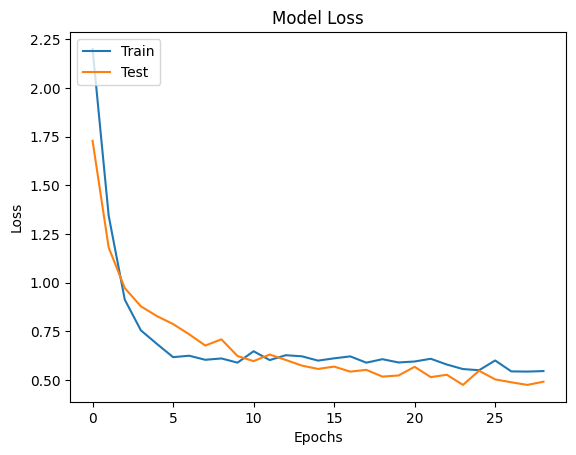

In [20]:
# summarize history for loss
plt.plot(classifier_report.history['loss'])
plt.plot(classifier_report.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()